Show data

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#list .csv files
import os
print("Files :")
for file in os.listdir():
    if "csv" in file:
        print(file)

Files :
100mesh.csv


Load data from file in object mesh

In [34]:
# load data
data_file = "100mesh.csv"
import pandas as pd
mesh = pd.read_csv(data_file)
display(mesh.head())

,intensity,two_theta_deg,theta_deg,theta_rad,sintheta,two_sin_theta,d-spacing,sin_squared_theta
0,5.0,30.00,15.000,0.261799,0.258819,0.517638,2.975052,0.066987
1,5.1,32.50,16.250,0.283616,0.279829,0.559658,2.751680,0.078304
2,5.2,29.25,14.625,0.255254,0.252492,0.504983,3.049607,0.063752
3,5.3,33.75,16.875,0.294524,0.290285,0.580569,2.652569,0.084265
4,5.4,35.75,17.875,0.311978,0.306941,0.613883,2.508622,0.094213


Some info about data

In [35]:
# min/max charasteristics for columns
for column in mesh.columns:
    print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
print(f"\nindex = {mesh.index}")

intensity : min = 5.0, max = 100.0
two_theta_deg : min = 1.0, max = 312.75
theta_deg : min = 0.5, max = 156.375
theta_rad : min = 0.008726646, max = 2.7292586180000002
sintheta : min = 0.008726535, max = 0.96869158
two_sin_theta : min = 0.017453071, max = 1.9373831609999999
d-spacing : min = 0.794886645, max = 88.23662038
sin_squared_theta : min = 7.62e-05, max = 0.9383633779999999

index = RangeIndex(start=0, stop=951, step=1)


In [36]:
#dataset structure
display(mesh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 8 columns):
intensity            951 non-null float64
two_theta_deg        951 non-null float64
theta_deg            951 non-null float64
theta_rad            951 non-null float64
sintheta             951 non-null float64
two_sin_theta        951 non-null float64
d-spacing            951 non-null float64
sin_squared_theta    951 non-null float64
dtypes: float64(8)
memory usage: 59.5 KB


None

In [37]:
# pd.plotting.scatter_matrix(mesh, alpha = 1, figsize = (15, 10), s = 1, color = 'black')
plt.scatter_matrix(mesh, alpha = 1, figsize = (15, 10), s = 1, color = 'black')

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter_matrix'

Find dependent data

In [7]:
# columns correlation
mesh.corr()

,intensity,two_theta_deg,theta_deg,theta_rad,sintheta,two_sin_theta,d-spacing,sin_squared_theta
intensity,1.000000,-0.216360,-0.216360,-0.216360,-0.280482,-0.280482,0.496481,-0.127535
two_theta_deg,-0.216360,1.000000,1.000000,1.000000,0.861654,0.861654,-0.421072,0.825311
theta_deg,-0.216360,1.000000,1.000000,1.000000,0.861654,0.861654,-0.421072,0.825311
theta_rad,-0.216360,1.000000,1.000000,1.000000,0.861654,0.861654,-0.421072,0.825311
sintheta,-0.280482,0.861654,0.861654,0.861654,1.000000,1.000000,-0.537137,0.920878
two_sin_theta,-0.280482,0.861654,0.861654,0.861654,1.000000,1.000000,-0.537137,0.920878
d-spacing,0.496481,-0.421072,-0.421072,-0.421072,-0.537137,-0.537137,1.000000,-0.309319
sin_squared_theta,-0.127535,0.825311,0.825311,0.825311,0.920878,0.920878,-0.309319,1.000000


In [8]:
#find huge correlations within data (>0.8)
corr_series=mesh.corr().abs().unstack().drop_duplicates().sort_values(ascending = False)
corr_series[(corr_series<1.0)&(corr_series>0.8)]

sintheta       two_sin_theta        1.000000
two_theta_deg  theta_rad            1.000000
sintheta       sin_squared_theta    0.920878
two_sin_theta  sin_squared_theta    0.920878
two_theta_deg  sintheta             0.861654
theta_rad      sintheta             0.861654
two_theta_deg  two_sin_theta        0.861654
theta_rad      two_sin_theta        0.861654
               sin_squared_theta    0.825311
two_theta_deg  sin_squared_theta    0.825311
dtype: float64

Drop dependent columns that depend on theta_deg

In [9]:
source = mesh
mesh = source[['intensity', 'theta_deg', 'd-spacing']]
mesh.head()

,intensity,theta_deg,d-spacing
0,5.0,15.000,2.975052
1,5.1,16.250,2.751680
2,5.2,14.625,3.049607
3,5.3,16.875,2.652569
4,5.4,17.875,2.508622


In [10]:
#check correlations
display(mesh.corr())

,intensity,theta_deg,d-spacing
intensity,1.000000,-0.216360,0.496481
theta_deg,-0.216360,1.000000,-0.421072
d-spacing,0.496481,-0.421072,1.000000


In [11]:
# min/max charasteristics for columns
for column in mesh.columns:
    print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
print(f"\nindex = {mesh.index}")

intensity : min = 5.0, max = 100.0
theta_deg : min = 0.5, max = 156.375
d-spacing : min = 0.794886645, max = 88.23662038

index = RangeIndex(start=0, stop=951, step=1)


intensity has data with uniform distribution (from 5.0 to 100 with step 0.1)

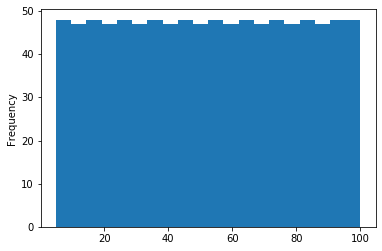

In [12]:
display(mesh['intensity'].plot.hist(bins = 20))

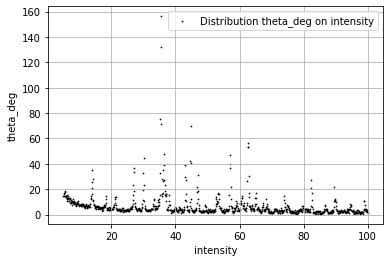

In [13]:
#Distribution intensity on theta_deg

plt.scatter(y = mesh['theta_deg'],x = mesh['intensity'], label = 'Distribution theta_deg on intensity', c  = 'black', s = 0.5)
plt.ylabel('theta_deg')
plt.xlabel('intensity')
plt.legend(loc='upper right')
plt.grid()
plt.show()

With some intensity theta_deg has big spread

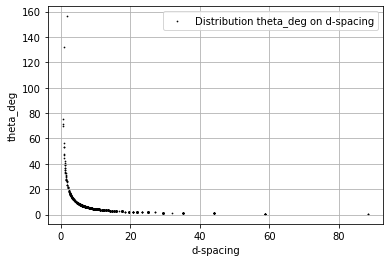

In [14]:
#Distribution d-spacing on theta_deg
plt.scatter(y = mesh['theta_deg'],x = mesh['d-spacing'], label = 'Distribution theta_deg on d-spacing', c  = 'black', s = 0.5)
plt.ylabel('theta_deg')
plt.xlabel('d-spacing')
plt.legend(loc='upper right')
plt.grid()
plt.show()

Let see sin(theta_deg) against theta_deg parameter

In [15]:
#to use correctly sin : theta_deg < 90
data = source[source['theta_deg']<90][['intensity', 'd-spacing', 'sintheta', 'theta_deg']]
data.head()

,intensity,d-spacing,sintheta,theta_deg
0,5.0,2.975052,0.258819,15.000
1,5.1,2.751680,0.279829,16.250
2,5.2,3.049607,0.252492,14.625
3,5.3,2.652569,0.290285,16.875
4,5.4,2.508622,0.306941,17.875


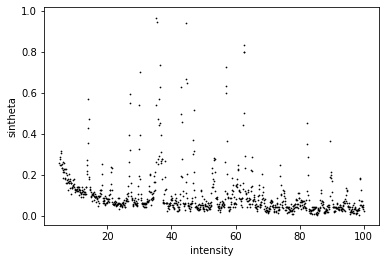

In [16]:
data.plot.scatter(x ='intensity', y = 'sintheta', s = .5, color = 'black')

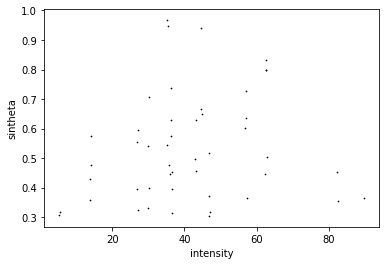

In [17]:
sintheta = data[data['sintheta']>0.3]
sintheta.plot.scatter(x ='intensity', y = 'sintheta', color = 'black', s=0.5)

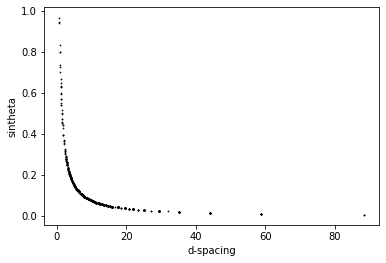

In [18]:
data.plot.scatter(x ='d-spacing', y = 'sintheta', s = .5, color = 'black')

Study dependency d-spacing on theta_deg. Suppose d-spacing ~ 1/theta_deg

In [19]:
data['1/sintheta'] = 1/data['sintheta']
data['1/theta_deg'] = 1/data['theta_deg']
data.head()

,intensity,d-spacing,sintheta,theta_deg,1/sintheta,1/theta_deg
0,5.0,2.975052,0.258819,15.000,3.863703,0.066667
1,5.1,2.751680,0.279829,16.250,3.573611,0.061538
2,5.2,3.049607,0.252492,14.625,3.960528,0.068376
3,5.3,2.652569,0.290285,16.875,3.444894,0.059259
4,5.4,2.508622,0.306941,17.875,3.257951,0.055944


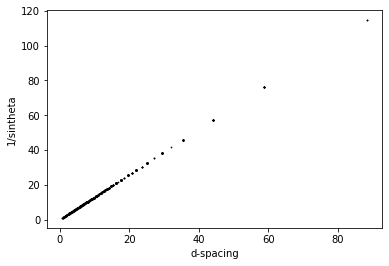

In [20]:
data.plot.scatter(x ='d-spacing', y = '1/sintheta', s = .5, color = 'black')

In [21]:
import sklearn.linear_model
# X = data['d-spacing']
# Y = data['1/sintheta']
n = len(data['d-spacing'])
X = data['d-spacing'].to_numpy().reshape((n,1))
Y = data['1/sintheta'].to_numpy().reshape((n,1))

# Ridge model
ridge = sklearn.linear_model.Ridge()
# train the model
ridge.fit(X, Y)
print("Ridge Model Coefs:",ridge.coef_[0][0],ridge.intercept_[0])
print("The score is: ",ridge.score(X,Y))

Ridge Model Coefs: 1.2986876524796902 0.00017796639636102896
The score is:  0.9999999998894284


Dependecy is like sintheta =~ 1/(1.3*d-spacing) or 0.77 = d-spacing * sintheta

Study d-spacing on intencity

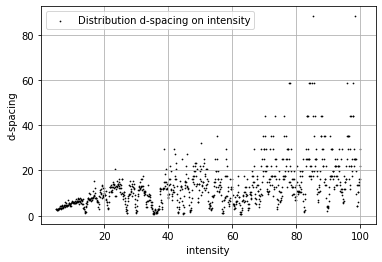

In [22]:
data = source
#Distribution d-spacing on theta_deg
plt.scatter(x = mesh['intensity'],
            y = mesh['d-spacing'], 
            label = 'Distribution d-spacing on intensity', 
            c  = 'black', 
            s = 0.5)
plt.xlabel('intensity')
plt.ylabel('d-spacing')
plt.legend(loc='upper left')
plt.grid()
plt.show()

As can see d-spacing has descrete values
Let's find them. Find minimum intencities to reach some levels of d-spacing.

In [23]:
mesh = mesh[['d-spacing','intensity']].sort_values(['d-spacing','intensity'], ascending = False)
mesh.head(5)

,d-spacing,intensity
934,88.236620,98.4
803,88.236620,85.3
927,58.825347,97.7
907,58.825347,95.7
805,58.825347,85.5


In [24]:
d_spacing = mesh['d-spacing'].to_list()
intensity = mesh['intensity'].to_list()
print(d_spacing[:5])
print(intensity[:5])

def find_edge(d_spacing,intensity):
    data_d_spacing = [d_spacing[0]]
    data_intensity = [intensity[0]]
    j = 0
    for i in range(len(d_spacing)):
        if(i>0):
            if (d_spacing[i]<data_d_spacing[j])& (intensity[i]<=data_intensity[j]):
                j=j+1
    #             add value
                data_d_spacing.append(d_spacing[i])
                data_intensity.append(intensity[i]) 
            if(d_spacing[i]==data_d_spacing[j]):
                if (intensity[i]<data_intensity[j]):
                    data_intensity[j] = intensity[i]
    return (data_d_spacing, data_intensity)

data_d_spacing , data_intensity = find_edge(d_spacing,intensity)

def add_step(x, y):
    x_ = [x[0]]
    y_= [y[0]]
    j = 0
    for i in range(len(x)):
        if i>0:
#             step
            x_.append(x[i])
            y_.append(y[i-1])
#             value
            x_.append(x[i])
            y_.append(y[i])
    return(x_,y_)

data_d_spacing , data_intensity = add_step(data_d_spacing , data_intensity)

print(data_d_spacing[:5])
print(data_intensity[:5])

[88.23662038, 88.23662038, 58.82534688, 58.82534688, 58.82534688]
[98.4, 85.3, 97.7, 95.7, 85.5]
[88.23662038, 58.82534688, 58.82534688, 44.11999014, 44.11999014]
[85.3, 85.3, 77.6, 77.6, 70.2]


In [25]:
data =pd.DataFrame({'d-spacing':data_d_spacing,'intensity':data_intensity})
data = mesh.merge(right = data, on = 'd-spacing')
data.head()


,d-spacing,intensity_x,intensity_y
0,88.236620,98.4,85.3
1,88.236620,85.3,85.3
2,58.825347,97.7,85.3
3,58.825347,97.7,77.6
4,58.825347,95.7,85.3


add point to levels wths high results

In [26]:
x = data['d-spacing'].to_list()
y = data['intensity_x'].to_list()
z = data['intensity_y'].to_list()
x.insert(0,88.236620)
y.insert(0,98.4)
z.insert(0,98.4)
data = pd.DataFrame({'d-spacing':x, 'intensity_x':y, 'intensity_y':z})

See minimum levels of intensity to reach d-spacing levels. Both figures on one plot.

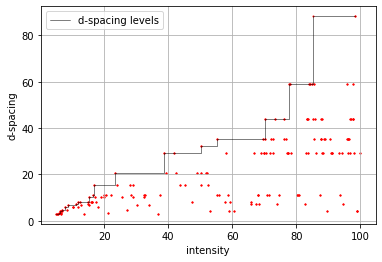

In [27]:
plt.scatter( data['intensity_x'],data['d-spacing'], s = 1, color = 'red' )
plt.plot( data['intensity_y'],data['d-spacing'], color = 'black',  linewidth = 0.5)
plt.xlabel('intensity')
plt.ylabel('d-spacing')
plt.grid()
plt.legend(['d-spacing levels'],loc = 'upper left')
plt.show()

d-spacing has * distribution.
d-spacing : min = 0.794886645, max = 88.23662038


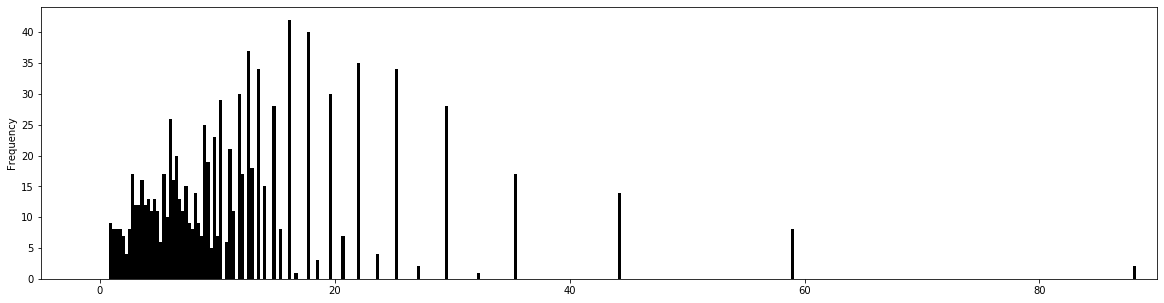

In [28]:
### histograms
column = 'd-spacing'
print(f"{column} has * distribution.")
print(f"{column} : min = {mesh[column].min()}, max = {mesh[column].max()}")
mesh[column].plot.hist(bins = len(data['d-spacing']) , color = 'black' , figsize = (20, 5), xlim = (-5, 90))

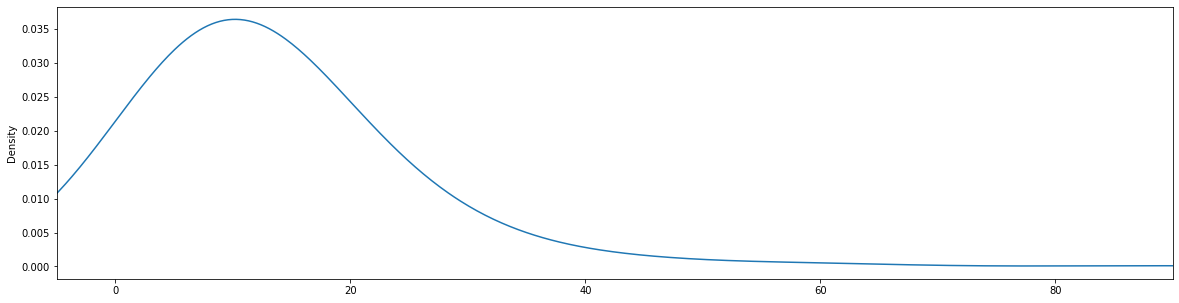

In [29]:
mesh['d-spacing'].plot.kde(figsize = (20,5), xlim = (-5, 90), bw_method = 0.8)

Count of d-spacing is 161
156    32.088717
157    35.297000
158    44.119990
159    58.825347
160    88.236620
Name: d-spacing, dtype: float64


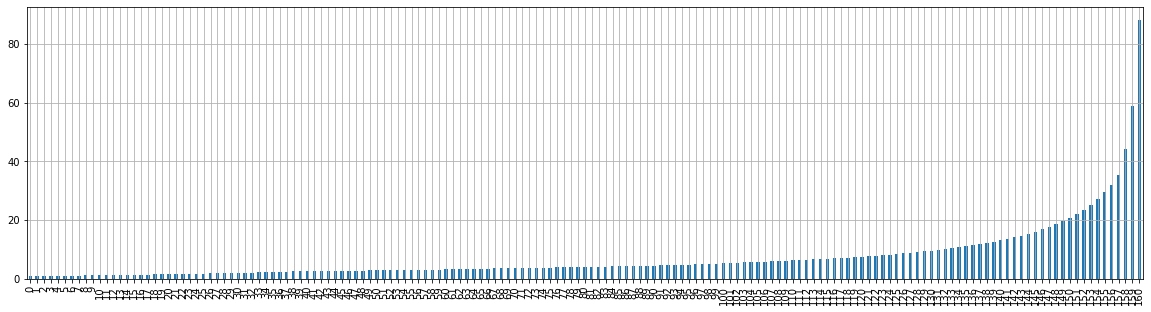

In [30]:
#as we can see d-spacing has discrete values
d_spacing=mesh['d-spacing'].unique()
d_spacing = pd.Series(sorted(d_spacing))
d_spacing.name  = 'd-spacing'
print(f"Count of d-spacing is {len(d_spacing)}")
ticks = []
for tick in range(0, len(d_spacing), 5):
    ticks.append(tick)
print(d_spacing.tail())
d_spacing.plot.bar( figsize = (20,5 ), grid = True)

# Summary:

Studied dependencies beetwean columns in data. 3 main columns was chosen (intensity, sintheta, d-spacing).
Intencity has uniform distribution. min = 5, max = 100 , step  = 0.1.
With rise of intensity 2 parameters (d-spacing, sintheta) are changing.
d-spacing has descret values with levels that open with rise of intensity.
d-spacing and sintheta have dependency like sintheta = 1/(1.3 d-spacing) or sintheta d-spacing = 0.77.